In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
sns.__version__

'0.13.2'

💓 1️⃣ 심혈관질환 위험요인 분석 (메인 디쉬급)

핵심 변수: HadHeartAttack, HadAngina, HadStroke, SmokerStatus, BMI, SleepHours, AgeCategory, AlcoholDrinkers, PhysicalActivities

할 수 있는 분석:

흡연·음주·수면시간에 따른 심혈관질환 발생률 비교 (barplot, heatmap)

BMI 구간별 심장질환 비율

로지스틱 회귀로 위험도 예측 (feature importance 시각화)

연령대별 위험도 곡선(lineplot)

🍽 인사이트 맛: “운동하지 않고 수면이 짧은 고BMI 흡연군은 위험률이 2배↑”

In [4]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df = df.drop(['RemovedTeeth', 'DeafOrHardOfHearing', 'HadSkinCancer', 'LastCheckupTime',  'HadKidneyDisease', 'DifficultyWalking', 'HadArthritis', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear'], axis=1)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes


In [5]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadDiabetes', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [6]:

df = df.dropna().reset_index()


In [7]:
df['HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df['HeartDisease'] = df['HeartDisease'].map({True: 1, False: 0})
df['HeartDisease'].value_counts()

HeartDisease
0    263396
1     25900
Name: count, dtype: int64

## 심장질환 여부


In [8]:
font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
plt.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

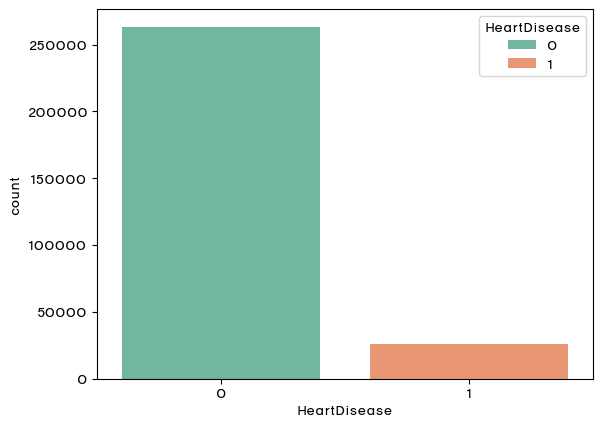

In [9]:



sns.countplot(data=df, x='HeartDisease', palette='Set2', hue='HeartDisease')



plt.show()

In [10]:
df['AgeCategory'].unique()

array(['Age 80 or older', 'Age 55 to 59', 'Age 40 to 44', 'Age 65 to 69',
       'Age 75 to 79', 'Age 70 to 74', 'Age 60 to 64', 'Age 50 to 54',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

C:\Users\TJ\AppData\Local\Temp\ipykernel_16380\2497649781.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


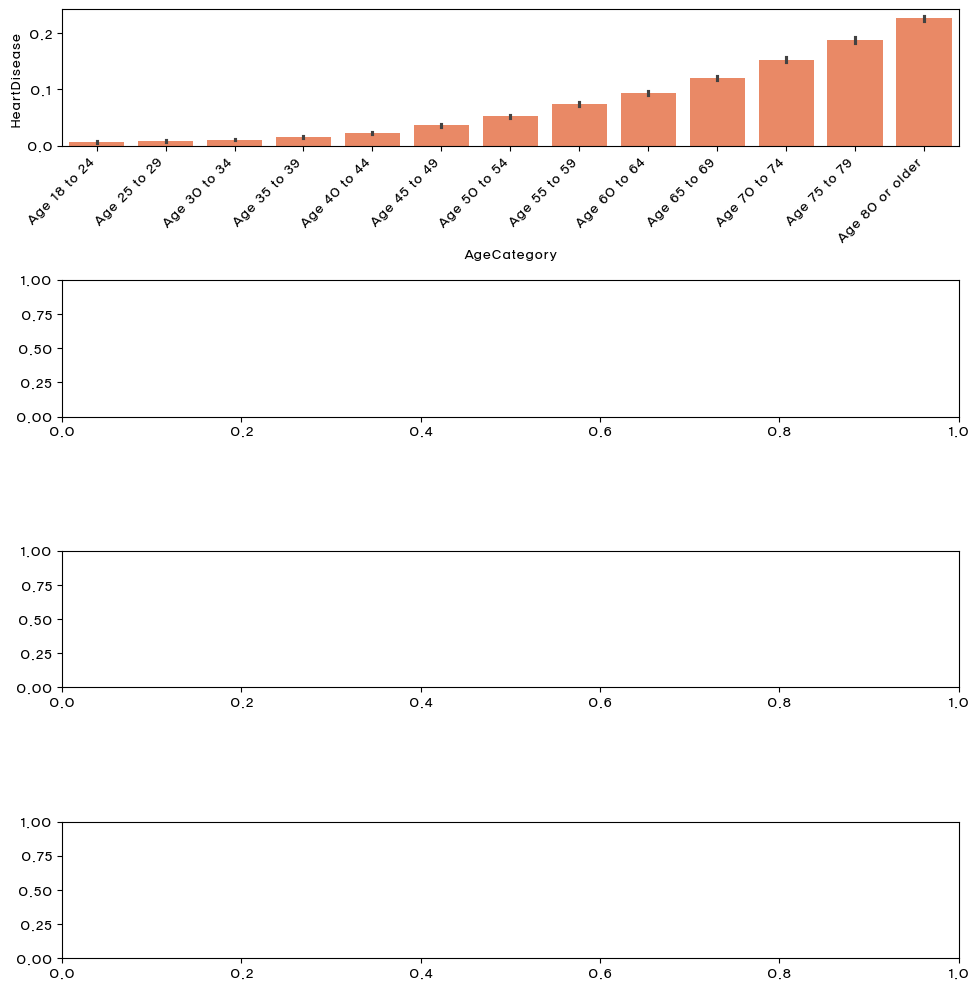

In [19]:
order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

fig, ax = plt.subplots(4, 1, figsize=(10,10))

sns.barplot(data=df, x = 'AgeCategory', y = 'HeartDisease', order=order, color = 'coral', ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [149]:
df['AgeCategory'].sort_values

<bound method Series.sort_values of 0         Age 80 or older
1            Age 55 to 59
2            Age 40 to 44
3         Age 80 or older
4         Age 80 or older
               ...       
289291       Age 25 to 29
289292       Age 65 to 69
289293       Age 50 to 54
289294       Age 70 to 74
289295       Age 40 to 44
Name: AgeCategory, Length: 289296, dtype: object>